#Question 1

##Part 1

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
if os.path.exists('anneal_names.txt'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/24t8jhmde1bzjmt/train.csv")

np.random.seed(42)

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
for i in df.columns:
    print(len(np.unique(df[i])))

2
2
75
2
3
3802
6
6
6
6
6
6
6
6
6
6
5
6
6
6
445
455
2


In [ ]:
col_to_encode=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for i in col_to_encode:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    print(f"{i} encoding: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")

Gender encoding: {'Female': 0, 'Male': 1}
Customer Type encoding: {'Loyal Customer': 0, 'disloyal Customer': 1}
Type of Travel encoding: {'Business travel': 0, 'Personal Travel': 1}
Class encoding: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction encoding: {'neutral or dissatisfied': 0, 'satisfied': 1}


In [ ]:
#Scalling the dataset
scaler = MinMaxScaler()
for col in df.columns:
    if(col!='satisfaction'):
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(len(df[col]),1))

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,1.0,0.205128,0.0,0.5,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000,0
103900,1.0,0.0,0.538462,0.0,0.0,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000,1
103901,1.0,1.0,0.294872,0.0,0.0,0.396607,0.2,0.2,0.2,0.6,...,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838,0
103902,0.0,1.0,0.192308,0.0,0.5,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000,0


In [ ]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.492480,0.182752,0.415134,0.310143,0.296972,0.233911,0.545951,0.612016,0.551397,0.595405,...,0.671668,0.676522,0.670280,0.657922,0.660865,0.728152,0.657279,0.009264,0.009582,0.433394
std,0.499946,0.386465,0.193758,0.462554,0.310385,0.201393,0.265573,0.305047,0.279787,0.255545,...,0.266606,0.257657,0.263082,0.295263,0.253079,0.235121,0.262439,0.023943,0.024431,0.495546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.256410,0.000000,0.000000,0.077342,0.400000,0.400000,0.400000,0.400000,...,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.423077,0.000000,0.500000,0.163772,0.600000,0.600000,0.600000,0.600000,...,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.564103,1.000000,0.500000,0.345719,0.800000,0.800000,0.800000,0.800000,...,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df to X,y
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [ ]:
len(X.columns)

22

##Part 2

In [ ]:
dt = DecisionTreeClassifier()
sfs = SFS(dt, k_features=10, forward=True, floating=False, scoring='accuracy')
sfs.fit(X, y)

for subset in sfs.subsets_.keys():
    print("Subset:", subset)
    print("Accuracy Score:", sfs.subsets_[subset]['avg_score'])
    print("------------------------------")

# Names of the features selected
print("Best 10 features selected by SFS:")
for feature_idx in sfs.k_feature_idx_:
    print(X.columns[feature_idx])

Subset: 1
Accuracy Score: 0.7903353102550807
------------------------------
Subset: 2
Accuracy Score: 0.8496148302952342
------------------------------
Subset: 3
Accuracy Score: 0.8912485041976396
------------------------------
Subset: 4
Accuracy Score: 0.9217136206489922
------------------------------
Subset: 5
Accuracy Score: 0.9292140469328342
------------------------------
Subset: 6
Accuracy Score: 0.941425187708744
------------------------------
Subset: 7
Accuracy Score: 0.9486842947294871
------------------------------
Subset: 8
Accuracy Score: 0.9513678517457645
------------------------------
Subset: 9
Accuracy Score: 0.9521497395022156
------------------------------
Subset: 10
Accuracy Score: 0.950653519908512
------------------------------
Best 10 features selected by SFS:
Customer Type
Type of Travel
Class
Inflight wifi service
Gate location
Online boarding
Seat comfort
Inflight entertainment
Baggage handling
Inflight service


##Part 3

In [ ]:
# SFS (forward=True, floating=False)
dt_sfs = DecisionTreeClassifier()
sfs = SFS(dt_sfs, k_features=10, forward=True, floating=False, scoring='accuracy',cv=4)
sfs.fit(X, y)

for k, v in sfs.subsets_.items():
    print("Subset:", k)
    print("cv_scores:", v['cv_scores'])

print(sfs.subsets_)

Subset: 1
cv_scores: [0.78976022 0.79180663 0.79326589 0.78650861]
Subset: 2
cv_scores: [0.84833391 0.85119117 0.85060622 0.84832806]
Subset: 3
cv_scores: [0.89146299 0.89204216 0.89253996 0.88894895]
Subset: 4
cv_scores: [0.91922468 0.92289278 0.92250367 0.9223106 ]
Subset: 5
cv_scores: [0.92775783 0.92849145 0.92953124 0.92953124]
Subset: 6
cv_scores: [0.93934129 0.94262327 0.93968646 0.94358638]
Subset: 7
cv_scores: [0.9464072  0.94872389 0.94849023 0.94933972]
Subset: 8
cv_scores: [0.94972779 0.95022974 0.9507684  0.95184956]
Subset: 9
cv_scores: [0.94880111 0.95096336 0.95142482 0.95227431]
Subset: 10
cv_scores: [0.94883972 0.94972779 0.94999614 0.95134759]
{1: {'feature_idx': (11,), 'cv_scores': array([0.78976022, 0.79180663, 0.79326589, 0.78650861]), 'avg_score': 0.790335338956137, 'feature_names': ('Online boarding',)}, 2: {'feature_idx': (3, 11), 'cv_scores': array([0.84833391, 0.85119117, 0.85060622, 0.84832806]), 'avg_score': 0.8496148397069446, 'feature_names': ('Type of Tr

In [ ]:
# SBS (forward=False, floating=False)
dt_sbs = DecisionTreeClassifier()
sbs = SFS(dt_sbs, k_features=10, forward=False, floating=False, scoring='accuracy',cv=4)
sbs.fit(X.values, y.values)

for k, v in sbs.subsets_.items():
    print("Subset:", k)
    print("cv_scores:", v['cv_scores'])

print(sbs.subsets_)

Subset: 22
cv_scores: [0.94343411 0.94594386 0.94493783 0.94636651]
Subset: 21
cv_scores: [0.9443994  0.94687054 0.94636651 0.94802687]
Subset: 20
cv_scores: [0.94505579 0.94524885 0.9454398  0.94891497]
Subset: 19
cv_scores: [0.94528746 0.94621414 0.94640513 0.9477952 ]
Subset: 18
cv_scores: [0.94555774 0.94729526 0.94571009 0.94698432]
Subset: 17
cv_scores: [0.94455384 0.94717943 0.94501506 0.9489922 ]
Subset: 16
cv_scores: [0.94625275 0.94791305 0.9442428  0.94794965]
Subset: 15
cv_scores: [0.94517163 0.94644581 0.94489922 0.94752491]
Subset: 14
cv_scores: [0.94455384 0.94799027 0.94559425 0.94590316]
Subset: 13
cv_scores: [0.94424495 0.94412912 0.94578732 0.9477952 ]
Subset: 12
cv_scores: [0.94667748 0.94744971 0.94640513 0.94961001]
Subset: 11
cv_scores: [0.94926445 0.9501139  0.94984169 0.95015059]
Subset: 10
cv_scores: [0.95084752 0.95104058 0.9507684  0.95281489]
{22: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21), 'cv_scores': ar

In [ ]:
# SFFS (forward=True, floating=True)
dt_sffs = DecisionTreeClassifier()
sffs = SFS(dt_sffs, k_features=10, forward=True, floating=True, scoring='accuracy',cv=4)
sffs.fit(X.values, y.values)

for k, v in sffs.subsets_.items():
    print("Subset:", k)
    print("cv_scores:", v['cv_scores'])

print(sffs.subsets_)

Subset: 1
cv_scores: [0.78976022 0.79180663 0.79326589 0.78650861]
Subset: 2
cv_scores: [0.84833391 0.85119117 0.85060622 0.84832806]
Subset: 3
cv_scores: [0.89146299 0.89204216 0.89253996 0.88894895]
Subset: 4
cv_scores: [0.91922468 0.92289278 0.92250367 0.9223106 ]
Subset: 5
cv_scores: [0.92775783 0.92849145 0.92953124 0.92953124]
Subset: 6
cv_scores: [0.93934129 0.94262327 0.93968646 0.94358638]
Subset: 7
cv_scores: [0.94636859 0.9487625  0.94849023 0.94926249]
Subset: 8
cv_scores: [0.94953473 0.9504228  0.95065256 0.95173372]
Subset: 9
cv_scores: [0.95050002 0.95096336 0.94980307 0.9525446 ]
Subset: 10
cv_scores: [0.95107919 0.95127225 0.95011198 0.95331686]
{1: {'feature_idx': (11,), 'cv_scores': array([0.78976022, 0.79180663, 0.79326589, 0.78650861]), 'avg_score': 0.790335338956137, 'feature_names': ('11',)}, 2: {'feature_idx': (3, 11), 'cv_scores': array([0.84833391, 0.85119117, 0.85060622, 0.84832806]), 'avg_score': 0.8496148397069446, 'feature_names': ('3', '11')}, 3: {'featur

In [ ]:
# SBFS (forward=False, floating=True)
dt_sbfs = DecisionTreeClassifier()
sbfs = SFS(dt_sbfs, k_features=10, forward=False, floating=True, scoring='accuracy',cv=4)
sbfs.fit(X.values, y.values)

for k, v in sbfs.subsets_.items():
    print("Subset:", k)
    print("cv_scores:", v['cv_scores'])

print(sbfs.subsets_)

Subset: 22
cv_scores: [0.94347272 0.94660025 0.94563287 0.94640513]
Subset: 21
cv_scores: [0.94358856 0.94729526 0.94605761 0.94729323]
Subset: 20
cv_scores: [0.94362717 0.94590525 0.94586455 0.94760213]
Subset: 19
cv_scores: [0.94555774 0.94744971 0.94578732 0.94733184]
Subset: 18
cv_scores: [0.9460983  0.94594386 0.94613484 0.94856746]
Subset: 17
cv_scores: [0.94420634 0.94768138 0.94478338 0.94787242]
Subset: 16
cv_scores: [0.94544191 0.94922584 0.9442428  0.94798826]
Subset: 15
cv_scores: [0.94493996 0.94687054 0.94528535 0.94802687]
Subset: 14
cv_scores: [0.94297077 0.94663887 0.94524674 0.94621206]
Subset: 13
cv_scores: [0.94451523 0.94482412 0.94439725 0.94744768]
Subset: 12
cv_scores: [0.94636859 0.94714082 0.94694571 0.94945556]
Subset: 11
cv_scores: [0.94953473 0.95026835 0.94961001 0.9507684 ]
Subset: 10
cv_scores: [0.95123364 0.95100197 0.95100008 0.95316241]
{22: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21), 'cv_scores': ar

In [ ]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sbs_results = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
sffs_results = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
sbfs_results = pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

print("SFS Results:\n", sfs_results)
print("SBS Results:\n", sbs_results)
print("SFFS Results:\n", sffs_results)
print("SBFS Results:\n", sbfs_results)

SFS Results:
                             feature_idx  \
1                                 (11,)   
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.942623267307618, 0.9396...  0.941309   
7   [0.9464071971890806, 0.9487238889532414

##Part 4

SFS


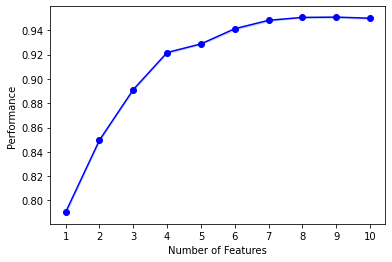

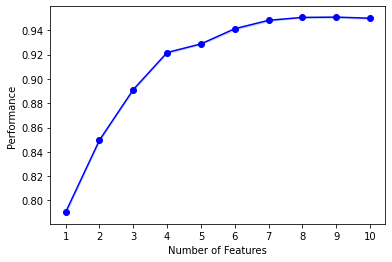

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

print("SFS")
plot_sfs(sfs.get_metric_dict(), kind='std_err')

SBS


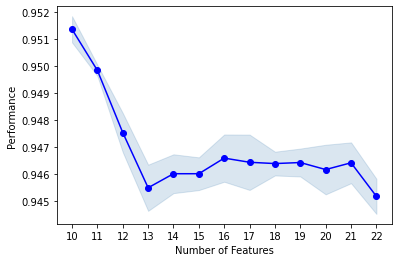

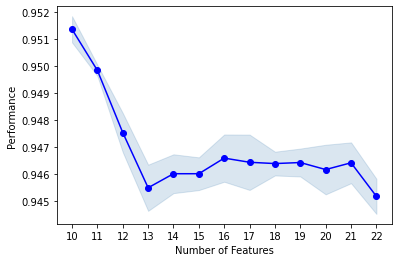

In [ ]:
print("SBS")
plot_sfs(sbs.get_metric_dict(), kind='std_err')

SFFS


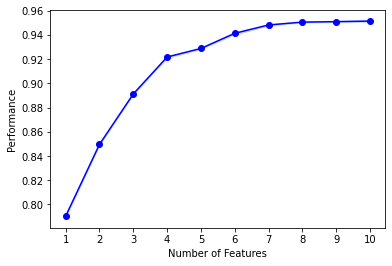

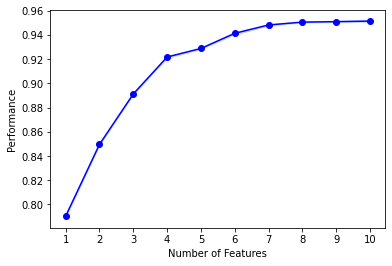

In [ ]:
print("SFFS")
plot_sfs(sffs.get_metric_dict(), kind='std_err')

SBFS


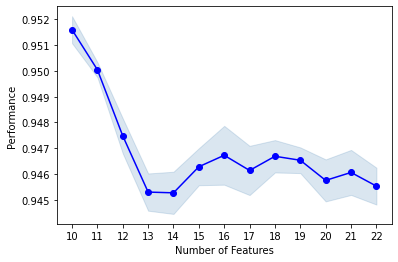

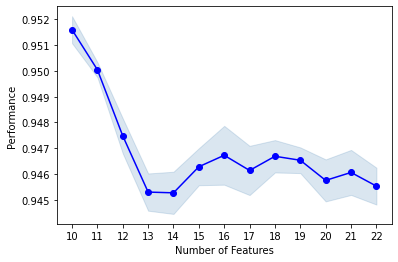

In [ ]:
print("SBFS")
plot_sfs(sbfs.get_metric_dict(), kind='std_err')

##Part 5

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from scipy.spatial.distance import pdist, squareform
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

def bi_directional_feature_selection(X, y, selection_criterion=None, distance_measure=None):
    # F1 = all features and F2 as empty (initialise)
    F1 = set(range(X.shape[1]))
    F2 = set()
    
    # distance matrix
    def distance_matrix_func(X_subset, y):
        if distance_measure == 'angular':
            return 1
        if distance_measure == 'euclidean':
            return pdist(X_subset, metric='euclidean')
        elif distance_measure == 'cityblock':
            return pdist(X_subset, metric='cityblock')
            
    # via accuracy_measure
    if selection_criterion == 'decision_tree':
        def selection_criterion_func(X_subset, y):
            dt = DecisionTreeClassifier()
            dt.fit(X_subset, y)
            return dt.score(X_subset, y)
    elif selection_criterion == 'svm':
        def selection_criterion_func(X_subset, y):
            svm = SVC()
            svm.fit(X_subset, y)
            return svm.score(X_subset, y)
    elif selection_criterion == 'info_gain':
        selection_criterion_func = lambda X_subset, y: mutual_info_classif(X_subset, y)
    else:                                                                       #selection_criterion == 'distance'
        def selection_criterion_func(X_subset, y,dist_func):
            dt = DecisionTreeClassifier()
            dt.fit(X,y)
            if distance_measure == 'angular':              
                similarity_matrix = cosine_similarity(X)
                score = similarity_matrix[np.triu_indices(similarity_matrix.shape[0], k=1)].mean()
                return score
            else :
                distance_matrix = squareform(dist_func)
            scores = cross_val_score(dt, distance_matrix, y, cv=2)
            return scores.mean()


    def criteria_or_distance_value(X_subset, y):
        if distance_measure is None:
            return np.mean(selection_criterion_func(X_subset, y))
        else:
            return np.mean(selection_criterion_func(X_subset,y,distance_matrix_func(X_subset, y)))


    # iterate until no more features can be added or removed
    bestie_score=[]
    while True:
        # print("size of F1: ", len(F1), "size of F2: ", len(F2))
        # forward step: remove one feature at a time from F1 and add it to F2
        curr_score = 0
        if F2 != set():
            curr_score = criteria_or_distance_value(X[:, list(F2)], y)
        # print("current score: ", curr_score)
        bestie_score.append(curr_score)

        scores_forward = []
        if F1 != set():
            for f in F1:
                F2_temp = F2.union({f})
                X_subset = X[:, list(F2_temp)]
                score = criteria_or_distance_value(X_subset, y)
                scores_forward.append((score, f))
            # backward step: remove one feature at a time from F2 and add it to F1
        scores_backward = []

        #F2 should have single feature
        if F2 != set():
            for f in F2:
                F2_temp = F2.difference({f})
                if F2_temp == set():
                    break
                X_subset = X[:, list(F2_temp)]
                score = criteria_or_distance_value(X_subset, y)
                scores_backward.append((score, f))


        # find the best score for forward and backward steps
        if F1 != set():
            best_forward = np.max(scores_forward, axis=0)
            best_forward_score = best_forward[0]
            best_forward_feature = int(best_forward[1])
            # print(best_forward_score, best_forward_feature)

        if F2 != set() and F2_temp != set():
            best_backward = np.max(scores_backward, axis=0)
            best_backward_score = best_backward[0]
            best_backward_feature = int(best_backward[1])
            # print(best_backward_score, best_backward_feature)

        best_of_all_score=curr_score
        if(F1 != set()):
            best_of_all_score = max(best_of_all_score, best_forward_score)
        if(F2 != set() and F2_temp != set()):
            best_of_all_score = max(best_of_all_score, best_backward_score)
        # best score for the current iteration
        if((F1 != set() and curr_score >= best_forward_score) and (F2 != set() and F2_temp != set() and curr_score >= best_backward_score)):
            break
        elif(F1 != set() and best_forward_score == best_of_all_score):
            F1= F1.difference({best_forward_feature})
            F2 = F2.union({best_forward_feature})
        elif(F2 != set() and F2_temp != set() and best_backward_score == best_of_all_score):
            F2 = F2.difference({best_backward_feature})
            F1 = F1.union({best_backward_feature})
        # if(len(bestie_score)>4):
        #     print(bestie_score)
        if(len(bestie_score)>16 and np.mean(bestie_score[-int(len(bestie_score)/2):])==np.mean(bestie_score[-int(len(bestie_score)/4):])):
            break
        if len(F1) == 0 or len(F2) == 0:
            break

    return list(F2)


##Part 6

In [ ]:
X_preserved=X.copy()
y_preserved=y.copy()

In [ ]:
#Decreasing data size as it is taking lot of time to train
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)
_, sample_idx = next(strat_split.split(X_preserved, y_preserved))
X = X_preserved.iloc[sample_idx,:]
y = y_preserved.iloc[sample_idx]

In [ ]:
print(X.shape)
print(y.shape)

(1000, 22)
(1000,)


In [ ]:
# Accuracy Measure using SVM Classifier
feature_set = bi_directional_feature_selection(X.values, y.values,selection_criterion='svm')
X_train, X_test, y_train, y_test = train_test_split(X.values[:, feature_set], y.values, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
print("Accuracy score using Decision Tree (metric - Accuracy Measure using SVM Classifier):", accuracy)

Accuracy score using Decision Tree (metric - Accuracy Measure using SVM Classifier): 0.875


In [ ]:
# Information Measures: Information gain
feature_set = bi_directional_feature_selection(X.values, y.values,selection_criterion='info_gain')
X_train, X_test, y_train, y_test = train_test_split(X.values[:, feature_set], y.values, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
print("Accuracy score using Decision Tree (metric - Information Measures: Information gain):", accuracy)

Accuracy score using Decision Tree (metric - Information Measures: Information gain): 0.81


In [ ]:
# Distance Measure: City-Block Distance
feature_set = bi_directional_feature_selection(X.values, y.values,distance_measure='cityblock')
X_train, X_test, y_train, y_test = train_test_split(X.values[:, feature_set], y.values, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
print("Accuracy score using Decision Tree (metric - Distance Measure: City-Block Distance:)", accuracy)

Accuracy score using Decision Tree (metric - Distance Measure: City-Block Distance:) 0.855


#Question 2

##Part 1

In [ ]:
np.random.seed(42)

cov_matrix = np.array([[0.6006771, 0.14889879, 0.244939],
                       [0.14889879, 0.58982531, 0.24154981],
                       [0.244939, 0.24154981, 0.48778655]])

#v
v = np.array([1/np.sqrt(6), 1/np.sqrt(6), -2/np.sqrt(6)]).reshape(-1,1)

# Generate data
n_points = 1000
data = np.random.multivariate_normal(mean=np.zeros(3), cov=cov_matrix, size=n_points)

# labelling
labels = np.where(np.dot(data, v) > 0, 0, 1)


In [ ]:
import plotly.graph_objs as go

trace = go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],
                     mode='markers', marker=dict(color=labels))

layout = go.Layout(title='3D Scatter Plot')

# Plottinh
fig = go.Figure(data=[trace], layout=layout)
fig.show()


##Part 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_transformed = pca.fit_transform(data)

##Part 3

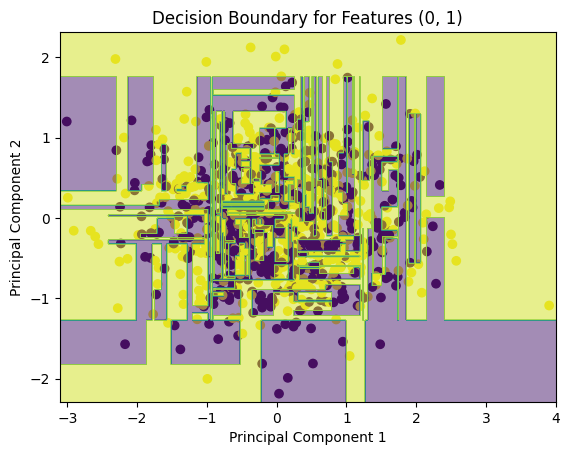

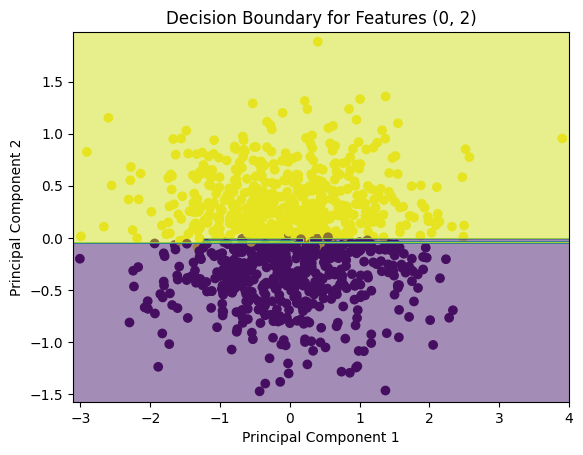

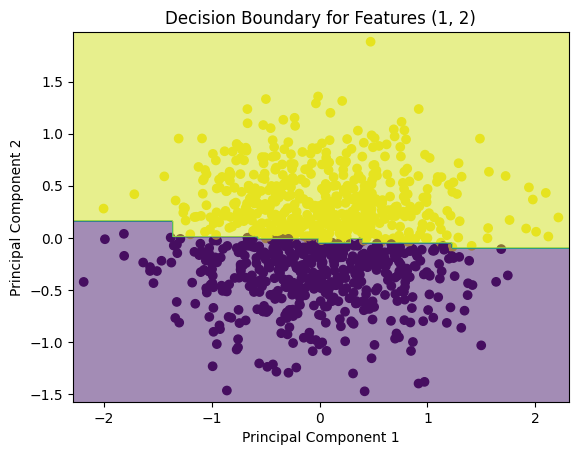

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import itertools

num_features = 2
feature_combinations = list(itertools.combinations(range(3), num_features))

for feature_pair in feature_combinations:
    X_subset = data_transformed[:, feature_pair]

    clf = DecisionTreeClassifier()
    clf.fit(X_subset, y)
    
    # Plotting
    plt.figure()
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y)
    plt.title(f'Decision Boundary for Features {feature_pair}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # Plotting
    x_min, x_max = X_subset[:, 0].min() - 0.1, X_subset[:, 0].max() + 0.1
    y_min, y_max = X_subset[:, 1].min() - 0.1, X_subset[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.show()

##Part 4

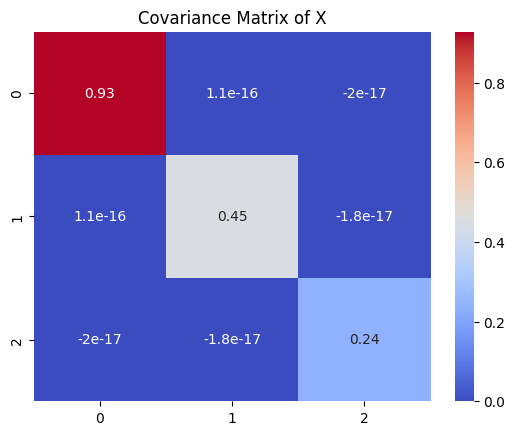

In [ ]:
cov_mat = np.cov(data_transformed.T)

# plotting
sns.heatmap(cov_mat, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix of X')
plt.show()

In [ ]:
X=data_transformed
y=labels

In [ ]:
# Features (0,2)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:, [0,2]], y, test_size=0.2)

# Fit
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

accuracy = tree.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.985


In [ ]:
# Features (1,2)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:, [1,2]], y, test_size=0.2)

# Fit
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

accuracy = tree.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [ ]:
# Features (0,1)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:, [0,1]], y, test_size=0.2)

# Fit
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

accuracy = tree.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.52
